<h2> Libraries Import</h2>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
import matplotlib.ticker as ticker
import time
import re

<h2> Data Import</h2>

In [3]:
Data = pd.read_csv('Amazon_DataSet.csv', dtype = {'reviewText' : str})
Data['Sentiment'] = Data['Sentiment'].replace(['Positive'], 1)
Data['Sentiment'] = Data['Sentiment'].replace(['Negative'], 0)

## Useful Functions

In [4]:
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    return all_words

## Raw Data Visualization

### Comparison of Negative and Positive reviews

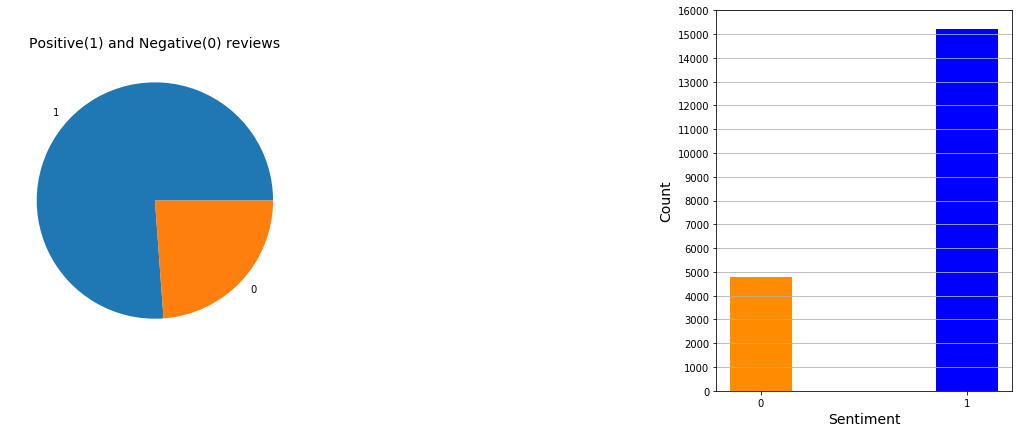

In [5]:
A = Data['Sentiment'].value_counts()

#pie plot
plt.figure(figsize=(18,7))
plt.subplot(1, 3, 1)
A.plot(kind = 'pie')
plt.ylabel("")
plt.title('Positive(1) and Negative(0) reviews', size=14)

#bar plot
plt.subplot(1, 3, 3)
plt.bar(['0', '1'],[A[0], A[1]], width = 0.3, color=['darkorange', 'blue'])
plt.xlabel('Sentiment', size=14)
plt.grid(axis='y')
plt.yticks(ticks=ticker.MultipleLocator(1000).tick_values(1000, 15000))
plt.ylabel('Count', size=14)
plt.show()

<h2> PreProcessing </h2>

#### Removing null values(if there is any)

In [6]:
Data.isnull().sum()
Data.dropna(inplace=True)

#### setting stemmer and stopwords

In [7]:
stop = stopwords.words('english')
stemmer = SnowballStemmer("english")

In [8]:
#removing stopwords
Data['reviewText'] = Data['reviewText'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))

#word tokenize and stemming method application
Data['reviewText'] = Data['reviewText'].apply(word_tokenize)
Data['reviewText'] = Data['reviewText'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))

## AfterProcessing Visualization

### Most frequent words used in reviews

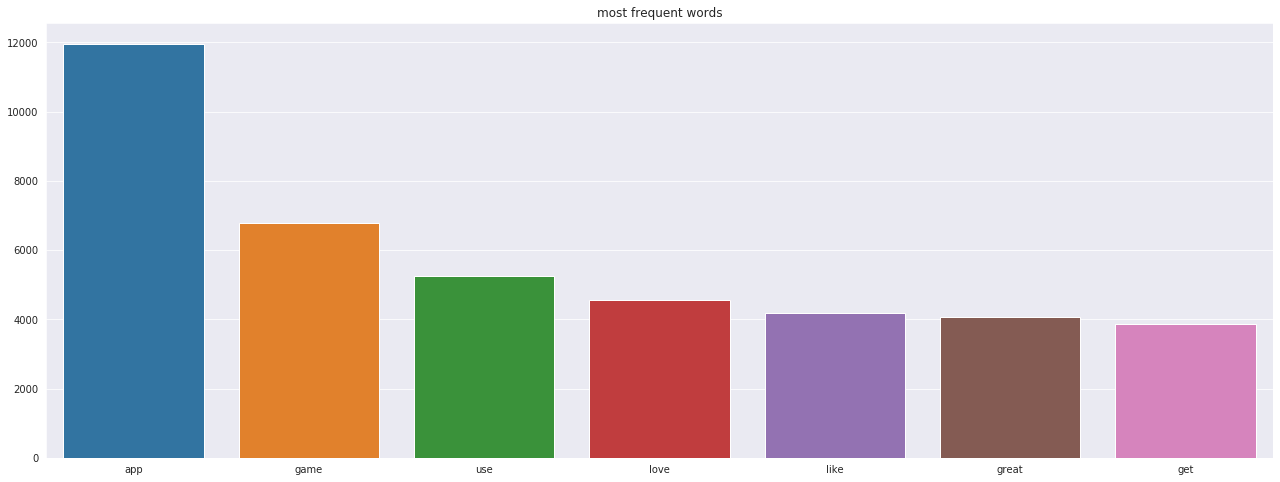

In [9]:
ListWords =  [word_tokenize(m) for m in list(Data['reviewText']) if m not in stopwords.words('english')]
all_words = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words.most_common(10)[3:]:
    count.append(w[1])
    Words.append(w[0])
plt.figure(figsize=(22,8))
sns.set_style("darkgrid")
plt.title("most frequent words")
sns.barplot(Words,count)
plt.show()

## Vectorizing words using Tf-id vectorizer

In [10]:
#Tfidvectorize
cv = TfidfVectorizer()
X = cv.fit_transform(Data['reviewText'] ).toarray()
#classification
x_train ,x_test,y_train,y_test=train_test_split(X,Data['Sentiment'], test_size=0.2 , random_state=13)

<h2> Building and Testing Models </h2>

#### using Logistic Regression

In [11]:
model = LogisticRegression()

stt = time.time()

#Model fitting
hist = model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

stp = time.time()
#model accuracy
print(f'model accuracy is : {accuracy_score(y_test,pred) * 100}%, model time consumption is : {stp - stt} second')

model accuracy is : 89.225%, model time consumption is : 14.393530368804932 second


#### using Stochastic Gradient Descent

In [12]:
model1 = SGDClassifier(alpha=10e-5, max_iter=500)

stt = time.time()

hist = model1.fit(x_train,y_train)

pred1 = model1.predict(x_test)

stp = time.time()

print(f'model accuracy is : {accuracy_score(y_test,pred1) * 100}%, model time consumption is : {stp - stt} second')

model accuracy is : 89.85%, model time consumption is : 10.726257562637329 second


# Classification Results

### 1- Logistic Regression

#### Visualizing Classification Report 

In [13]:
report = classification_report(y_test,pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

cm = sns.light_palette("purple", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.870000,0.650000,0.740000,952.000000
1,0.900000,0.970000,0.930000,3048.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.880000,0.810000,0.840000,4000.000000
weighted avg,0.890000,0.890000,0.890000,4000.000000


#### Visualizing Confusion Matrix 

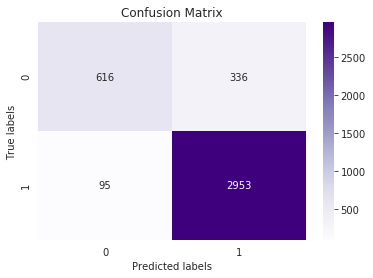

In [14]:
ax= plt.subplot()
cm=confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

### 2- Stochastic Gradient Descent

#### Visualizing Classification Report

In [15]:
report = classification_report(y_test,pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.820000,0.740000,0.780000,952.000000
1,0.920000,0.950000,0.930000,3048.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.870000,0.840000,0.860000,4000.000000
weighted avg,0.900000,0.900000,0.900000,4000.000000


#### Visualizing Confusion Matrix 

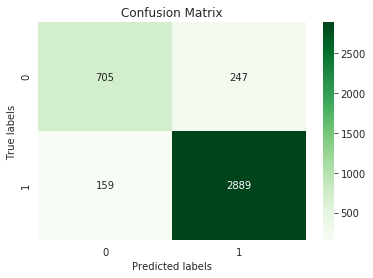

In [16]:
ax= plt.subplot()
cm=confusion_matrix(y_test,pred1)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);